## Exploratory Data Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("processed data.csv")

In [7]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 9,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,3.5,0,Merlin1A,167.743129,9.047721,0
1,2,2007-03-21,Falcon 9,5919.165341,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,3.5,0,Merlin2A,167.743129,9.047721,0
2,4,2008-09-28,Falcon 9,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,3.5,0,Merlin2C,167.743129,9.047721,0
3,5,2009-07-13,Falcon 9,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,3.5,0,Merlin3C,167.743129,9.047721,0
4,6,2010-06-04,Falcon 9,5919.165341,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [8]:
#del df["Unnamed: 0"]

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.


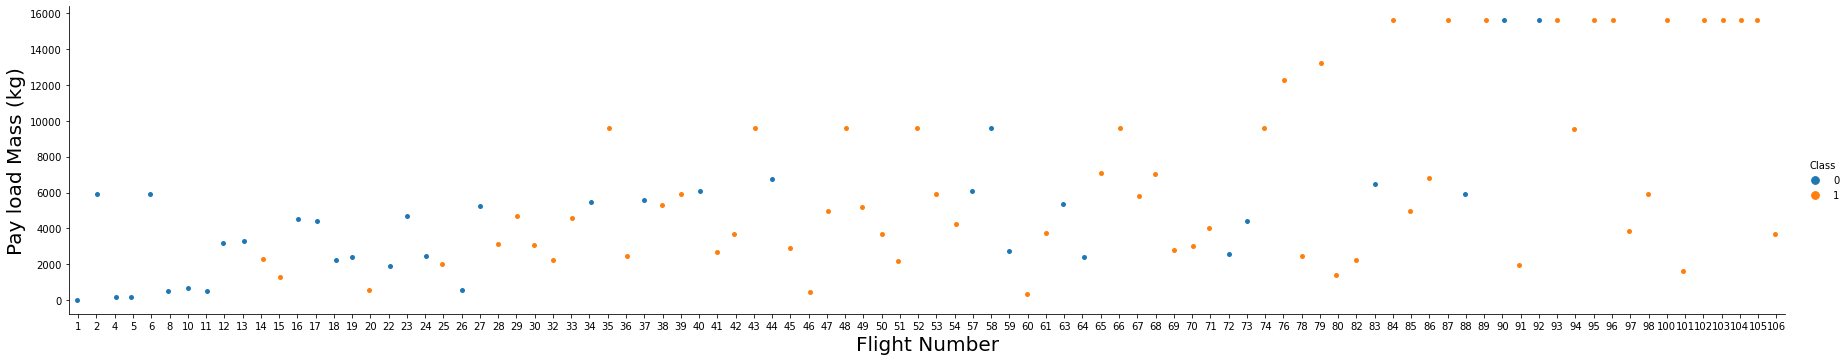

In [28]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


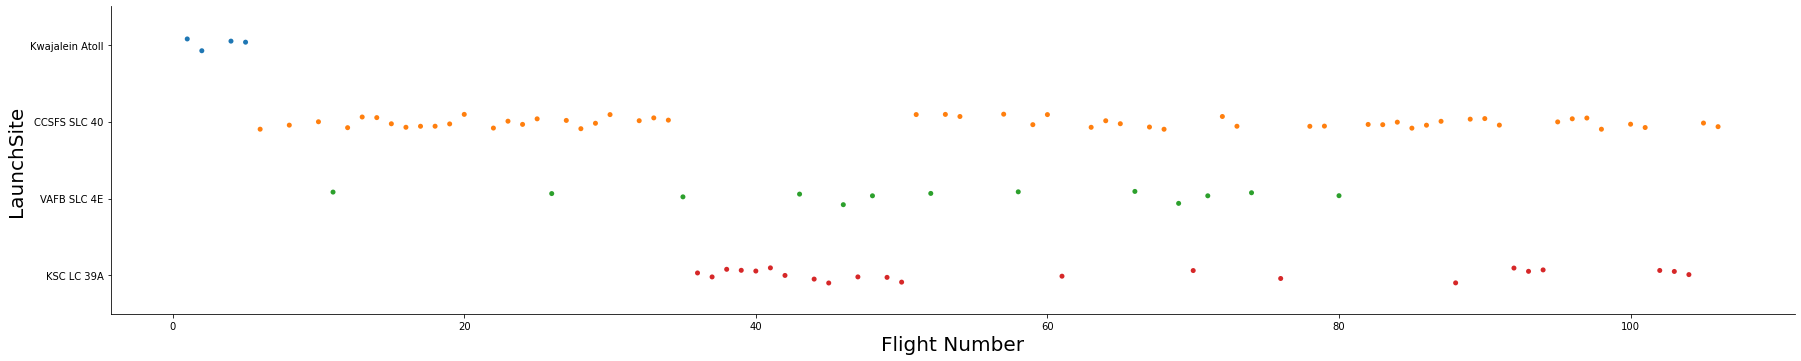

In [29]:
sns.catplot(y="LaunchSite", x="FlightNumber", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value


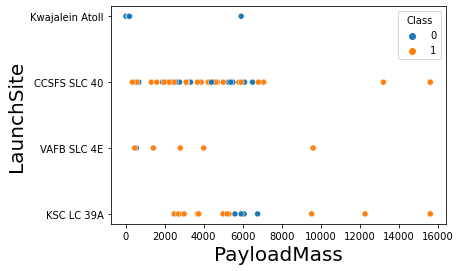

In [30]:
sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Let's create a `bar chart` for the sucess rate of each orbit


Text(0, 0.5, 'sucess rate')

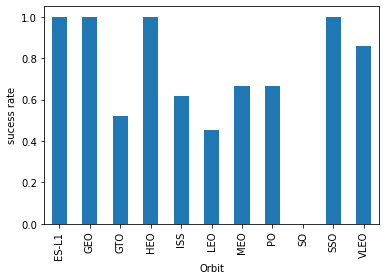

In [31]:
df.groupby("Orbit")["Class"].mean().plot(kind = "bar")
plt.xlabel("Orbit")
plt.ylabel("sucess rate")


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


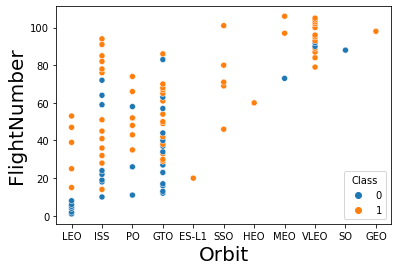

In [32]:
sns.scatterplot(y="FlightNumber", x="Orbit", hue="Class", data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


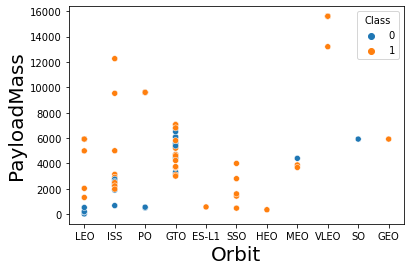

In [33]:
sns.scatterplot(y="PayloadMass", x="Orbit", hue="Class", data=df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [63]:
year = []
for i in df["Date"]:
    a = i.split("-")[0]
    #.split ("-") is used to convert date into list
    year.append(a)



In [67]:
df["year"]= year

Text(0, 0.5, 'sucess rate')

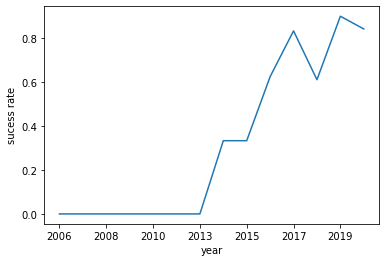

In [70]:
df.groupby("year")["Class"].mean().plot()
plt.xlabel("year")
plt.ylabel("sucess rate")


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [91]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,20.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,3.5,0,Merlin1A
1,2,5919.165341,LEO,Kwajalein Atoll,1,False,False,False,NaN,3.5,0,Merlin2A
2,4,165.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,3.5,0,Merlin2C
3,5,200.000000,LEO,Kwajalein Atoll,1,False,False,False,NaN,3.5,0,Merlin3C
4,6,5919.165341,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003


In [92]:
features_coding=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_coding

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Serial_Merlin1A,Serial_Merlin2A,Serial_Merlin2C,Serial_Merlin3C
0,1,20.000000,1,False,False,False,3.5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,5919.165341,1,False,False,False,3.5,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,165.000000,1,False,False,False,3.5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,200.000000,1,False,False,False,3.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,5919.165341,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,15600.000000,2,True,True,True,5.0,12,0,0,...,0,0,0,0,1,0,0,0,0,0
90,103,15600.000000,3,True,True,True,5.0,12,0,0,...,0,0,1,0,0,0,0,0,0,0
91,104,15600.000000,6,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
92,105,15600.000000,3,True,True,True,5.0,12,0,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
dummie_data = features_coding.astype("float64")

In [85]:
dummie_data.dtypes

FlightNumber       float64
PayloadMass        float64
Flights            float64
GridFins           float64
Reused             float64
                    ...   
Serial_B1062       float64
Serial_Merlin1A    float64
Serial_Merlin2A    float64
Serial_Merlin2C    float64
Serial_Merlin3C    float64
Length: 85, dtype: object

In [87]:
dummie_data.to_csv("analyzed_data.csv",index = False)